# Contrast Limited Adaptive Histogram Equalization (CLAHE) for Contrast Enhancement on Images

**Made by: Group 6 for Pattern Recognition Class**
 - Timothy Chan
 - Rhyle Nodnylson Guinto
 - Chino Laguda - PPT
 - Randall Joseph Pajaro - Python Ntbk

In [1]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

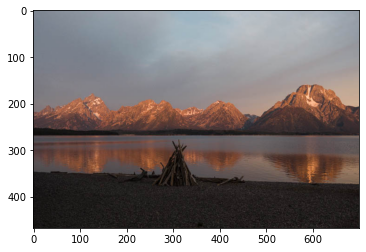

In [2]:
# sample image
sample = mpimg.imread('sample.jpg')
imgplot = plt.imshow(sample)

plt.rcParams["figure.figsize"] = (16,16) #just to resize the plot to make it bigger
plt.show()

## Applying Histogram Equalization using Numpy

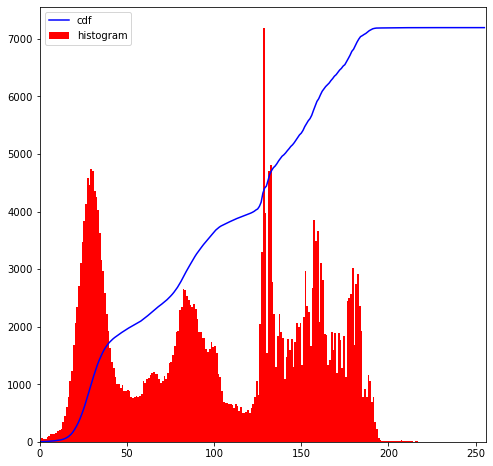

True

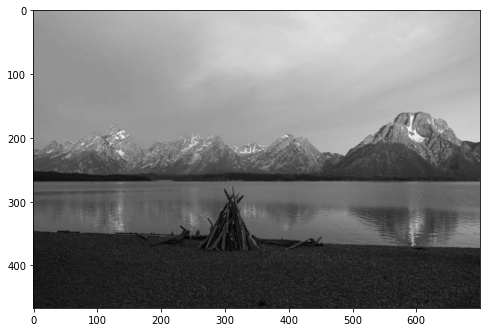

In [3]:
import numpy as np
import cv2 as cv

img = cv.imread('sample.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) #converting image to grayscale
hist,bins = np.histogram(img.flatten(),256,[0,256])

#cdf = cumulative distribution function - describes the probability that a random variable X wit ha given probability distribution will be found at a value less than or equal to x.
cdf = hist.cumsum() 
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.rcParams["figure.figsize"] = (8,8)
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'),loc='upper left')
plt.show()
plt.imshow(img, cmap='gray')

cv.imwrite('gray_samp.jpg',img) #saves grayscaled image

In [4]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

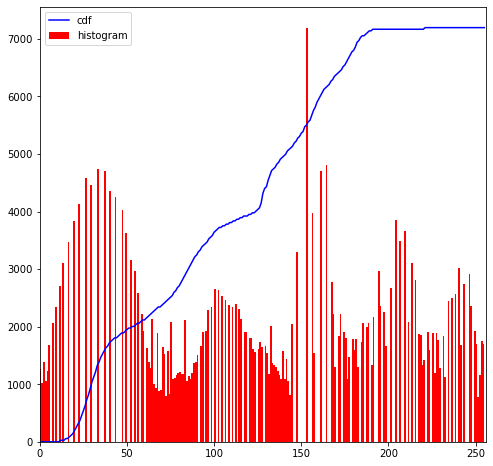

True

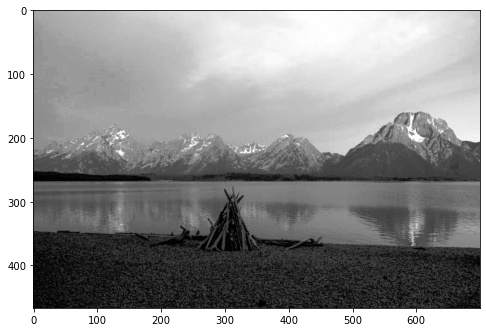

In [5]:
he_numpy_img = cdf[img]
hist,bins = np.histogram(he_numpy_img.flatten(),256,[0,256])
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.rcParams["figure.figsize"] = (8,8)
plt.plot(cdf_normalized, color='b')
plt.hist(he_numpy_img.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'),loc='upper left')
plt.show()
plt.imshow(he_numpy_img, cmap='gray')

cv.imwrite('he_samp.jpg',he_numpy_img) #saves image with HE applied

## Applying Histogram Equalization using OpenCV

In [6]:
import numpy as np
import cv2 as cv

img = cv.imread('sample.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) #converting image to grayscale

hist_eq = cv.equalizeHist(img)
res = np.hstack((img,hist_eq))
cv.imwrite('open_cv_he.jpg',res)

True

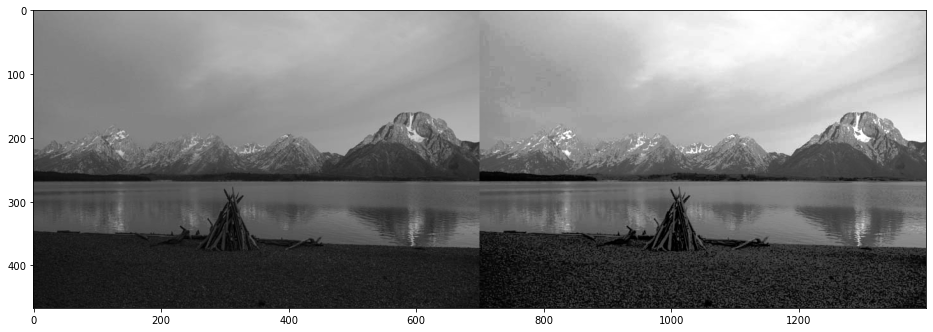

In [7]:
plt.rcParams["figure.figsize"] = (16,16)
plt.imshow(res, cmap='gray')

#left image is the original
#right image is the one with histogram equalization applied

## Applying CLAHE using OpenCV

True

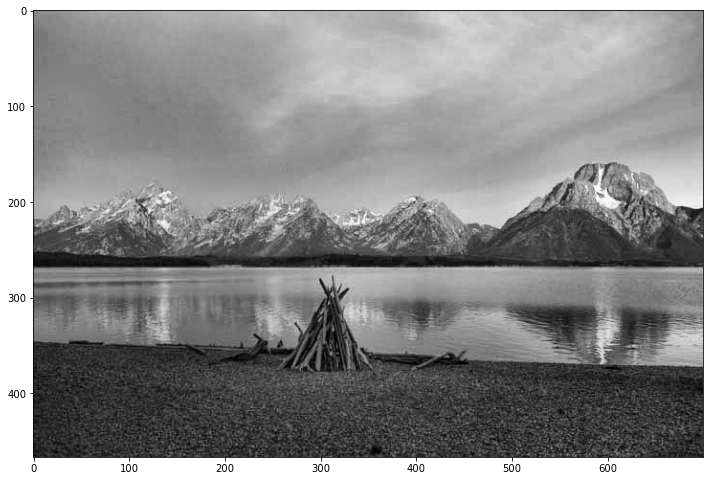

In [8]:
import numpy as np
import cv2 as cv

img = cv.imread('sample.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) #converting image to grayscale

clahe = cv.createCLAHE(clipLimit=2)
clahe_img = clahe.apply(img)

plt.rcParams["figure.figsize"] = (12,12)
plt.imshow(clahe_img,cmap='gray')
cv.imwrite('clahe_img.jpg',clahe_img)

In conclusion, we observed that by applying histogram equalization on an image globally, the result of the contrast enhancement would show the more dominant intensity. 

Meaning if a dominant area of the image is composed of a brighter intensity, the darker parts of the image may not have increased contrast due to having a limited contrast increase globally; whereas if the dominant area of the image is composed of a lower intensity, it could over-intesify the contrast of the brighter areas of the image. (for this image, the former was present.)